<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/eda_util_etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 패키지 호출 및 기초설정

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings(action='ignore')
%matplotlib inline
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

### pivot

In [ ]:
pivot = pd.pivot_table(data=df, index='date_col', values='amt_col', \
                       aggfunc='sum').reset_index()

### random

In [ ]:
np.random.randint(6) # 0 ~ 5까지 랜덤값
np.random.randint(1, 20) # 1~19까지 랜덤
#균일분포 표준정규분포 난수 생성
np.random.rand(6) # 0~1 사이 난수 6개 
np.random.rand(3, 2) # 0~1 사이 난수 6개(3x2)
# 평균0, 편차1의 가우시안 난수생성
np.random.randn(3, 2) # 6개 (3x2)

array([[ 0.30986644,  2.04565591],
       [ 0.65427509, -0.54409923],
       [-0.31302381,  0.25128853]])

### EDA

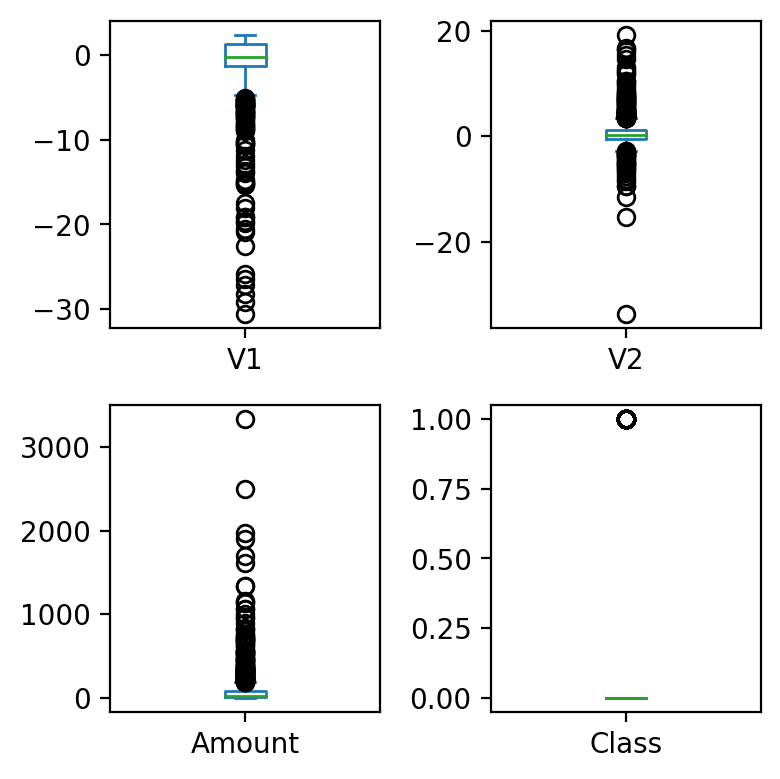

In [ ]:
def EDA(name, df) :
    n_loop=30
    print("== EDA : ", name)
    print('='*n_loop)
    
    print('\n', '-'*10,  ' COLUMN INFO ', '-'*10)
    print(df.info())
    
    print('\n', '-'*10,  ' NULL CHECK  (%)', '-'*10)
    print(round((df.isnull().sum()/len(df))*100, 2))
    
    print('\n', '-'*10, 'DESC INFO ', '-'*10)
    display(df.describe().T)
#     print(df.select_dtypes(include=object).columns)
#     print(df.select_dtypes(exclude=object).columns)

# candle 그래프 그리기
df[['V1', 'V2', 'Amount', 'Class']].plot(kind='box', subplots=True, 
        layout=(2, len(df[['V1', 'V2', 'Amount', 'Class']].columns)//2), 
       figsize=(4,4))
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head(3)
# df.info()[:4]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0


### Preprocessing

In [ ]:
# 문자열 int 변경
df['custom'] = df['custom'].str.replace('$', '', regex=True).astype(int)

### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rf.predict(x_test)))
tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(x_test)).ravel()
print(f'TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}')

### CROSS_VAL_SCORE (K-Fold) 교차검증
scoring 파라미터 종류는 아래와 같음
-  분류 (classification) 용
    - accuracy, roc_auc, f1, f1_micro, neg_log_loss, recall
- 회귀 (regression)
    - explained_variance, max_error, neg_mean_absolute_error
    - r2, neg_mean_squared_error, neg_root_mean_squared_error ...

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
kfold = KFold(n_splits=10)
rf = RandomForestClassifier(random_state=42)
# scoring=accuracy, roc_auc , f1, f1_micro, neg_log_loss, recall...
# 
score = cross_val_score(rf, X_scaled_train, y_train, cv=kfold, scoring="roc_auc")
print(score.mean())
print(score)

# 2번
score = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
print(score.mean())
print(score)

### GridSearchCV

In [ ]:
grid_param = {"n_estimators":range(100, 1000, 100), \
              "min_samples_split":range(1, 10, 1), \
              "min_samples_leaf":range(1,5,1), \
              "max_features":["log2", "sqrt", "auto"]}
grid_search = GridSearchCV(model, grid_param)
grid_search.fit(X_scaled_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.score(X_scaled_test, y_test))

### FeatureImportances

In [ ]:
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("Top 20 Feature Importances")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### 누락된값 채우기 (imputer)

In [ ]:
# from fancyimpute import KNN  # pip install fancyimpute
# from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# 모의 특성 행렬을 만듦
features, _ = make_blobs(n_samples = 100,
                         n_features = 2,
                         random_state = 1)

print('생성된 feature\n')
print(features[:5])
print('-'*30)
# print('특성을 표준화')
scaler = StandardScaler()
standard_features = scaler.fit_transform(features)

# 첫 번째 샘플의 1열 특성을 삭제 (nan 대입)
print('표준화 된 값 출력')
print(standard_features[:5])
true_value = standard_features[0, 0]
standard_features[0, 0] = np.nan

# 특성 행렬에 누락된 값을 예측
mean_imputer = SimpleImputer(strategy='mean', verbose=0)

features_knn_imputed = KNNImputer(n_neighbors=5).fit_transform(standard_features)
# features_knn = KNN(k=5, verbose=0).fit_transform(standard_features)
features_imputer_mean = mean_imputer.fit_transform(standard_features)

print('-'*30)
print('실제 값:', true_value)
print('대체된 값(KNNImpute):', features_knn_imputed[0, 0])
# print('대체된 값(KNN):', features_knn[0, 0])
print('대체된 값(Imputer mean):', features_imputer_mean[0, 0])

생성된 feature

[[ -0.79415228   2.10495117]
 [ -9.15155186  -4.81286449]
 [-11.44182631  -4.45781441]
 [ -9.76761777  -3.19133737]
 [ -4.53655648  -8.40186288]]
------------------------------
표준화 된 값 출력
[[ 1.43125781  0.86931636]
 [-0.87155021 -0.43778772]
 [-1.50261521 -0.37070189]
 [-1.04130176 -0.1314042 ]
 [ 0.40007122 -1.11592005]]
------------------------------
실제 값: 1.4312578131537823
대체된 값(KNNImpute): 1.4204209238999357
대체된 값(Imputer mean): -0.014457149627816341


### 스태킹 (Stacking)   이거 아래 코드부분 더 해라
https://hwi-doc.tistory.com/entry/%EC%8A%A4%ED%83%9C%ED%82%B9Stacking-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC
스태킹은 여러 가지 모델들의 예측값을 최종 모델의 학습 데이터로 사용하는 예측하는 방법 입니다.

**기본 모델로부터 예측된 값들이 최종모델의 학습데이터로 사용**된다

In [ ]:
# from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
# from mlxtend.regressor import StackingCVRegressor

# Load the Boston Housing dataset
X, y = load_boston(return_X_y=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

# Define the meta-model
stacked_model = StackingCVRegressor(regressors=(rf, lr), meta_regressor=LinearRegression(), cv=5)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = stacked_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Compare the performance to the base models
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("RF Scores:", -rf_scores.mean())
print("LR Scores:", -lr_scores.mean())

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
# from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load Boston housing dataset
X, y = load_diabetes(return_X_y=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define base models
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()

# Train base models on training data
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions on testing data using base models
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)

# Combine predictions from base models into new feature matrix for meta-model training
meta_X = np.column_stack((lr_pred, knn_pred, rf_pred))

# Train meta-model on new feature matrix and true target values from testing data
meta_lr = LinearRegression()
meta_lr.fit(meta_X, y_test)

# Make final prediction using stacked model on new data point x_new
x_new = np.array([0.1]*13).reshape(1,-1) # Example new data point with all features equal to 0.1

lr_new_pred = lr.predict(x_new)
knn_new_pred = knn.predict(x_new)
rf_new_pred = rf.predict(x_new)

meta_X_new = np.column_stack((lr_new_pred, knn_new_pred, rf_new_pred))
final_prediction = meta_lr.predict(meta_X_new)

ValueError: X has 13 features, but LinearRegression is expecting 10 features as input.

### Graph
### 덴드로그램(dendrogram)

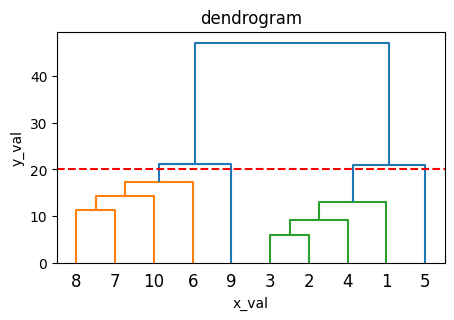

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,30],
             [85,70], [71,80], [60,78], [70,55], [80,91],])
linked = linkage(X, 'single')
labelList = range(1, 11)

plt.figure(figsize=(5, 3))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            color_threshold=20, # 색상 구분 시각화
            distance_sort='descending',
            show_leaf_counts=True)
plt.axhline(y=20, color='r', linestyle='--') # 주로 color_threshold랑 같게
# plt.axvline(x=9, color='b', linestyle='-.')
plt.title('dendrogram'); plt.xlabel('x_val');plt.ylabel('y_val')
plt.show()

### barplot

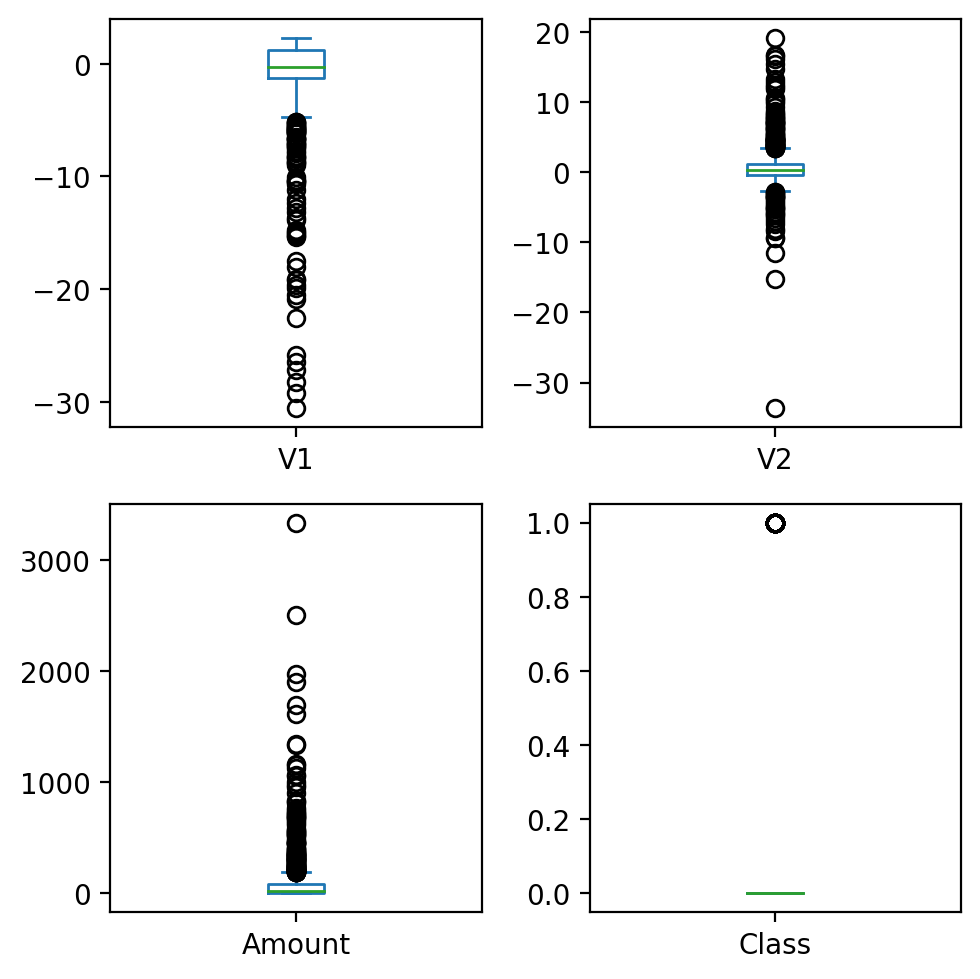

In [ ]:
df[['V1', 'V2', 'Amount', 'Class']].plot(kind='box', subplots=True, 
        layout=(2, len(df[['V1', 'V2', 'Amount', 'Class']].columns)//2), 
       figsize=(5,5))
plt.tight_layout()
plt.show()

### 날짜 시간 변경 (datetime)

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.week
df['dow'] = df['date'].dt.day_name() # friday, sunday

pd.date_range('2023-03-01', '2023-03-10') # 기간데이터

In [ ]:
from datetime import datetime, date, time
now = datetime.now()
print('now:', now) # '2023-03-10 16:19:28'
today = datetime.today()
print('today:', today)
ymdhms = datetime(2023, 3, 10, 15, 20, 0)
ymd = date(2023,3,9)
print('ymdhms:', ymdhms, ', ymd:', ymd)
time_stamp_date = date.fromtimestamp(1602374400)
time_stamp_datetime = datetime.fromtimestamp(1602374400)
print('time_stamp_date:', time_stamp_date)
print('time_stamp_datetime:', time_stamp_datetime)
make_t = time(hour=15, minute=20, second=10, \
                 microsecond=123456)
print('maketime:', make_t)
print('hour, min, sec:', make_t.hour, make_t.minute, make_t.second)
print()
# time_delta
time1 = date(year = 2020, month = 10, day = 11)
time2 = date(year = 2018, month = 11, day = 22)
time_delta = time1 - time2
print("time_delta =", time_delta)
print("type =", type(time_delta))

time1 = datetime(year = 2020, month = 10, day = 11, hour = 15, minute =43, second = 30)
time2 = datetime(year = 2018, month = 11, day = 22, hour = 12, minute = 20, second = 11)
time_delta = time1 - time2
print("time_delta =", time_delta)
print("time_delta total_sec =", time_delta.total_seconds())
print('타임델타 days and sec:', time_delta.days, time_delta.seconds)
print("type =", type(time_delta))
print()

# 특정 시간형식으로 변환
now = datetime.now()
format_date = now.strftime("%H:%M:%S")
print("time:", format_date)

format_date = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:", format_date)

format_date = now.strftime("%d/%m/%Y, %H:%M:%S")
print("date and time:", format_date)
print()

# 문자열 datetime 객체변화
date_str = "11 October, 2020"
datetime_obj = datetime.strptime(date_str, "%d %B, %Y")
print("문자열 변환 date =", datetime_obj)
print(type(datetime_obj))

date_str = "11/10/2020, 12:20:30"
datetime_obj = datetime.strptime(date_str, "%d/%m/%Y, %H:%M:%S")
print("문자열 변환 date =", datetime_obj)
print(type(datetime_obj))

now: 2023-03-10 16:33:39.652436
today: 2023-03-10 16:33:39.652614
ymdhms: 2023-03-10 15:20:00 , ymd: 2023-03-09
time_stamp_date: 2020-10-11
time_stamp_datetime: 2020-10-11 09:00:00
maketime: 15:20:10.123456
hour, min, sec: 15 20 10

time_delta = 689 days, 0:00:00
type = <class 'datetime.timedelta'>
time_delta = 689 days, 3:23:19
time_delta total_sec = 59541799.0
타임델타 days, sec: 689 12199
type = <class 'datetime.timedelta'>

time: 16:33:39
date and time: 03/10/2023, 16:33:39
date and time: 10/03/2023, 16:33:39

문자열 변환 date = 2020-10-11 00:00:00
<class 'datetime.datetime'>
문자열 변환 date = 2020-10-11 12:20:30
<class 'datetime.datetime'>


In [ ]:
date_list = pd.date_range('20230101', '20230331', freq='D', tz='Asia/Seoul') # M, 3M 
print('date_list:', date_list[:5])
# 3개월간격 월말,
date_3eom = pd.date_range('20230101', '20231220', freq=pd.offsets.MonthEnd(3))
print('3_endOfMonth:', date_3eom[:5])

date_period = pd.date_range('20230101', periods=8)
print('period:', date_period)
date_period = pd.date_range('20230101', '20230301', periods=3)
print('3개만:', date_period)

date_list: DatetimeIndex(['2023-01-01 00:00:00+09:00', '2023-01-02 00:00:00+09:00',
               '2023-01-03 00:00:00+09:00', '2023-01-04 00:00:00+09:00',
               '2023-01-05 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='D')
3_endOfMonth: DatetimeIndex(['2023-01-31', '2023-04-30', '2023-07-31', '2023-10-31'], dtype='datetime64[ns]', freq='3M')
period: DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
              dtype='datetime64[ns]', freq='D')
3개만: DatetimeIndex(['2023-01-01 00:00:00', '2023-01-30 12:00:00',
               '2023-03-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)


### 카테고리 임베딩
카테고리 임베딩(embedding)은 **선형회귀**에서 범주값 대신 범주값의 특성을 나타내는 연속값 혹은 연속값 벡터를 사용하는 방법이다.

예를 들면 운동선수의 이름을 나타내는 범주값의 경우 해당 운동선수의 나이, 연봉, 신체능력치 등을 대신 사용한다. 또 다른 예로 지역명을 나타내는 범주값의 경우에는 해당 지역의 면적, 인구수 등을 사용할 수 있다.

하지만 임베딩을 사용하는 경우에는 데이터 분석 목적에 맞게 특징을 선택해야 하고 현재 가지고 있는 데이터가 아닌 외부의 추가적인 데이터를 조사해야 한다는 부담이 있다.

### 시계열

,data
date,
2022-01-01 00:00:00,77
2022-01-01 01:00:00,67
2022-01-01 02:00:00,89


,data,rolling_mean,first_derivative,second_derivative
date,,,,
2022-01-19 21:00:00,66,58.2,-38.0,-4.25
2022-01-19 22:00:00,13,52.9,-20.5,20.00
2022-01-19 23:00:00,25,47.0,2.0,6.25
2022-01-20 00:00:00,17,44.1,-8.0,-10.00


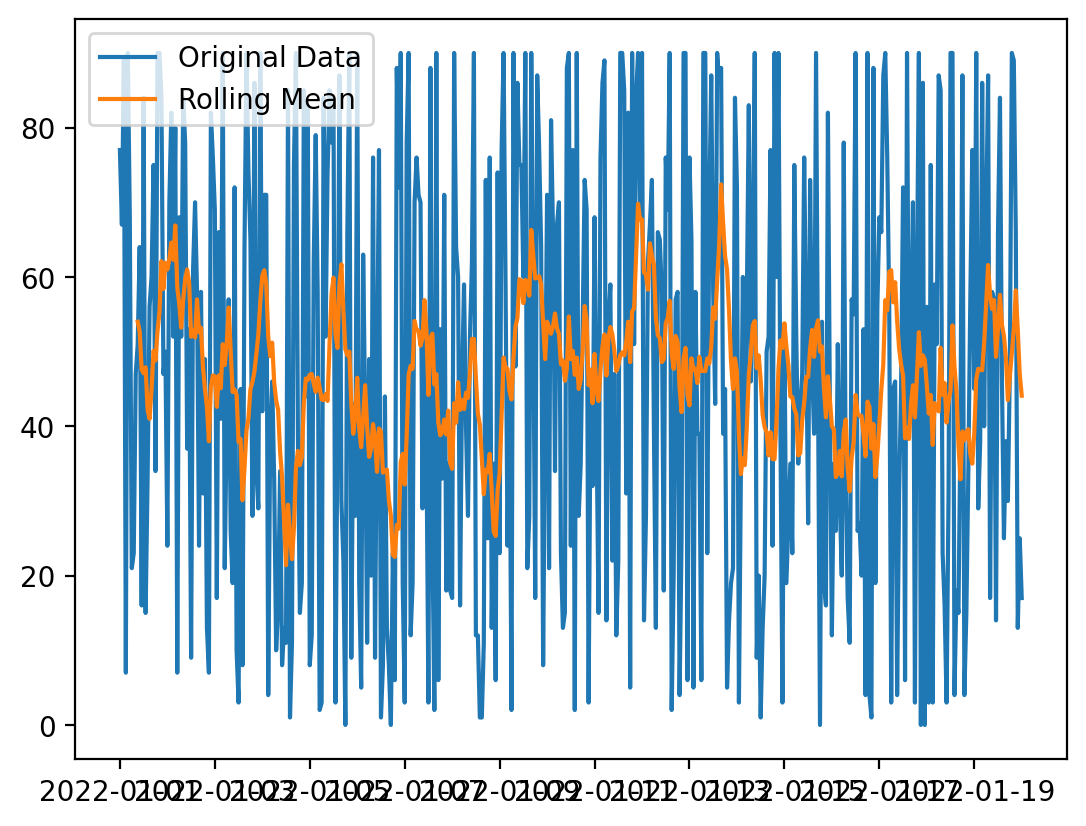

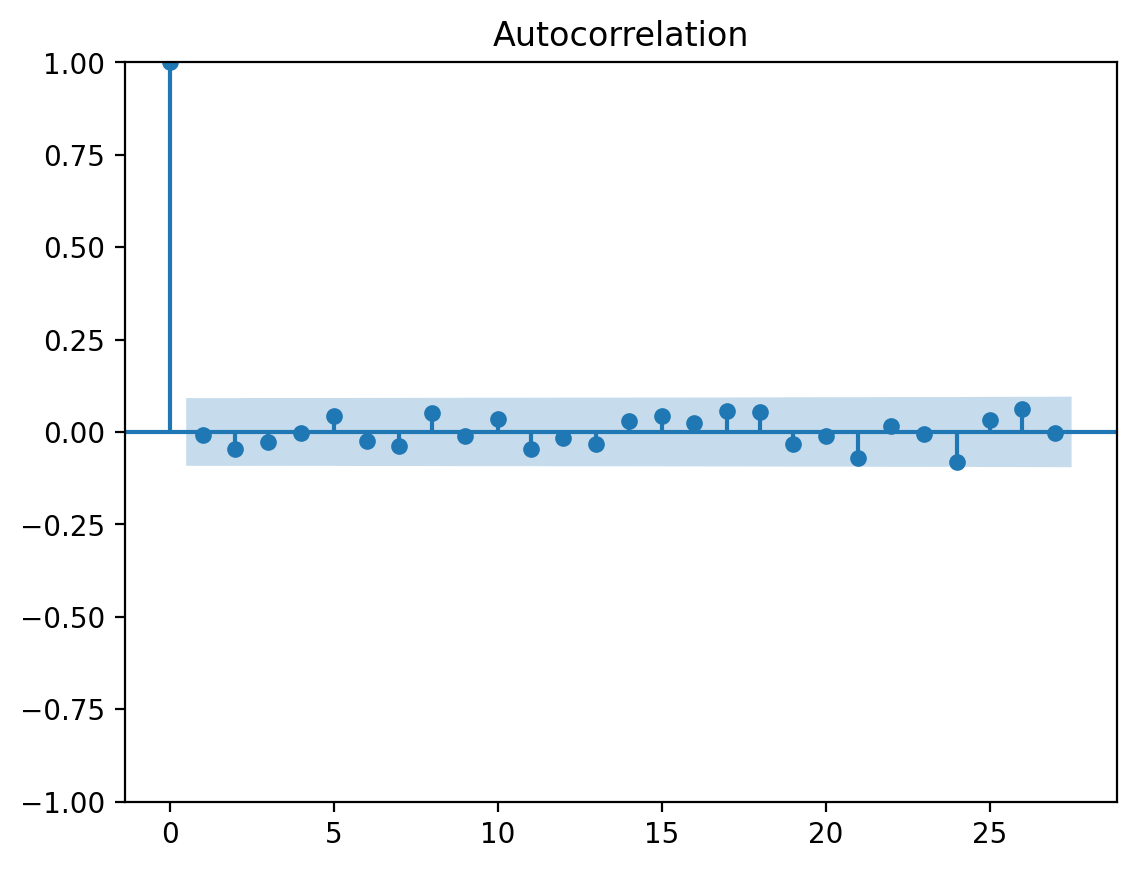

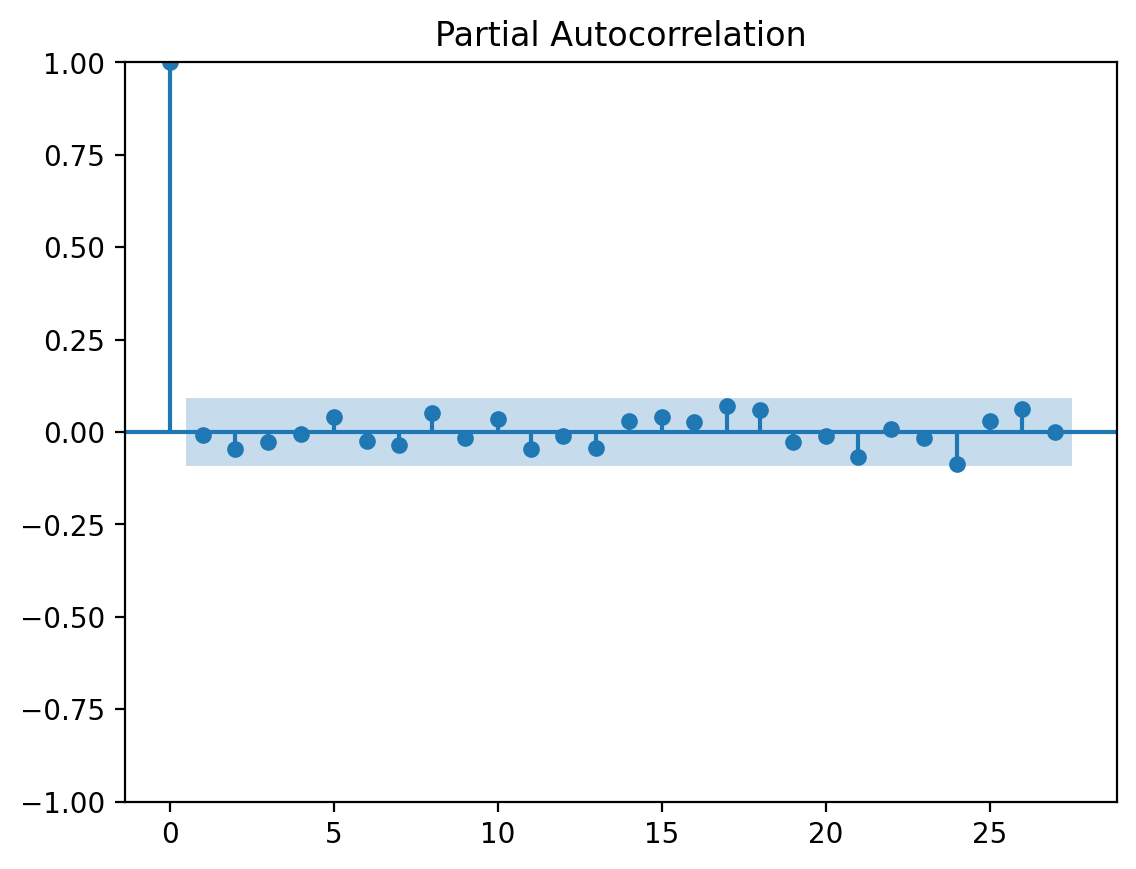

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# create a date range
date_rng = pd.date_range(start='2022-01-01', end='2022-01-20', freq='H')

# create a DataFrame with random data
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

# set the date column as the index
df.set_index('date', inplace=True)
display(df.head(3))
# search and process data
df.loc[df['data'] > 90, 'data'] = 90
df.fillna(method='ffill', inplace=True)

# calculate moving averages
df['rolling_mean'] = df['data'].rolling(window=10).mean()
# calculate first and second derivatives
df['first_derivative'] = np.gradient(df['data'])
df['second_derivative'] = np.gradient(df['first_derivative'])
display(df.tail(4))
# plot the data and moving averages
plt.plot(df.index, df['data'], label='Original Data')
plt.plot(df.index, df['rolling_mean'], label='Rolling Mean')
plt.legend(loc='upper left')
plt.show()

# draw autocorrelation and partial autocorrelation functions
plot_acf(df['data'])
plot_pacf(df['data'])
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88895D+00    |proj g|=  9.31893D-02

At iterate    5    f=  4.81899D+00    |proj g|=  1.07094D-02


 This problem is unconstrained.



At iterate   10    f=  4.74117D+00    |proj g|=  1.19648D-01

At iterate   15    f=  4.70886D+00    |proj g|=  8.84005D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     21      1     0     0   4.049D-05   4.709D+00
  F =   4.7088570392865270     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                               data   No. Observations:                  365
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1718.733
Date:                     

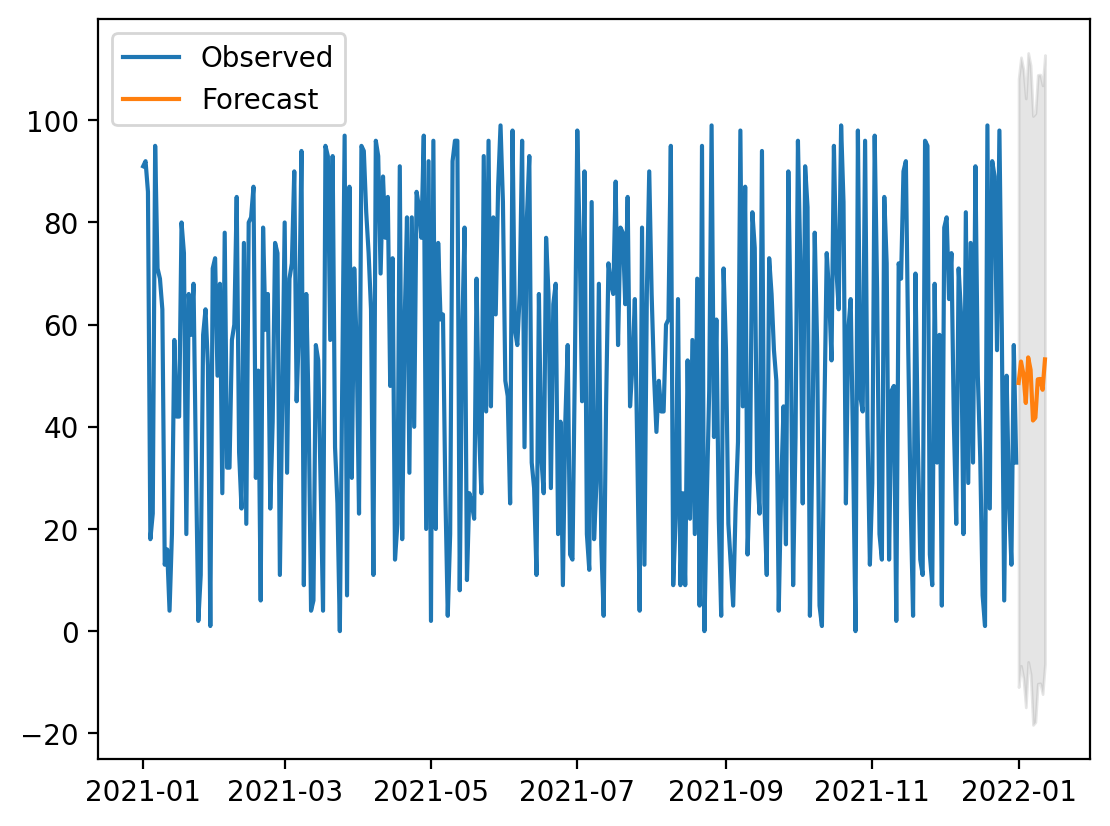

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# create a date range
date_rng = pd.date_range(start='1/1/2021', end='12/31/2021', freq='D')

# create a DataFrame with random data
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

# set the date column as the index
df.set_index('date', inplace=True)

# create a SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(df['data'], order=(2,1,1), seasonal_order=(1,1,1,12))
sarima_results = sarima_model.fit()

# print the model summary
print(sarima_results.summary())

# make predictions for the next 12 months
forecast = sarima_results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# plot the forecast
plt.plot(df.index, df['data'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean.values, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend(loc='upper left')
plt.show()

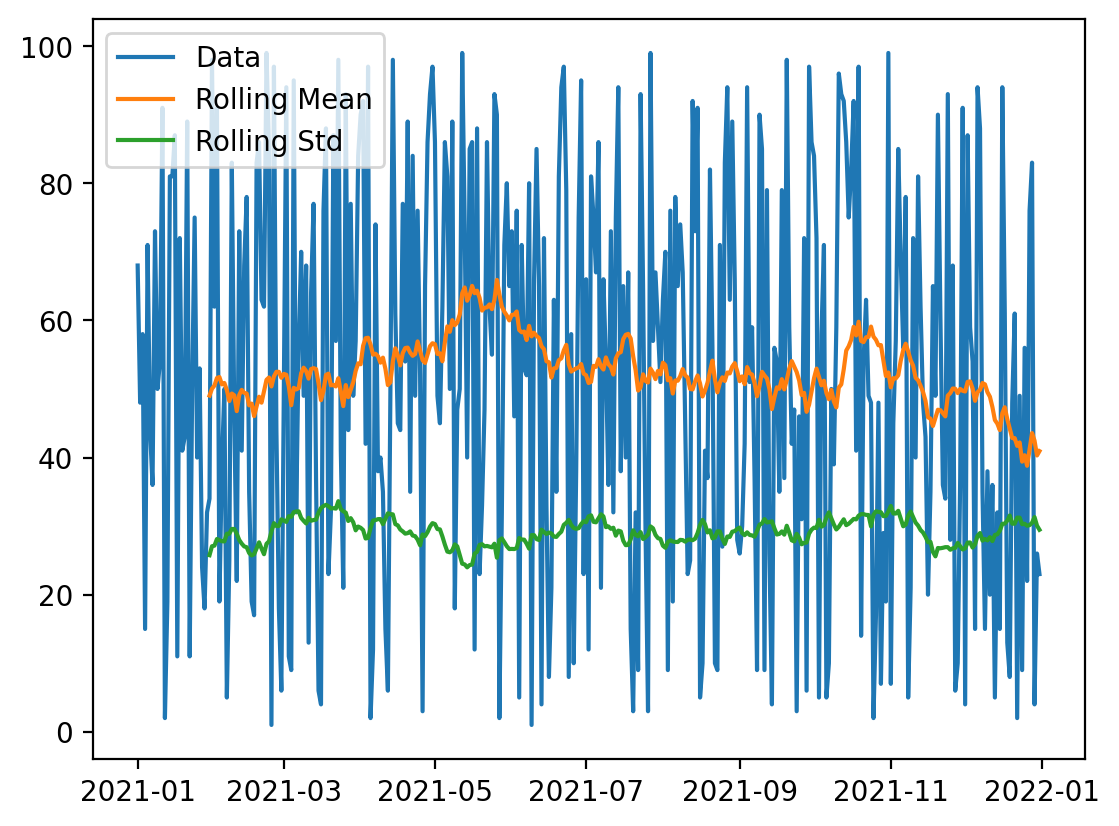

<Figure size 300x300 with 0 Axes>

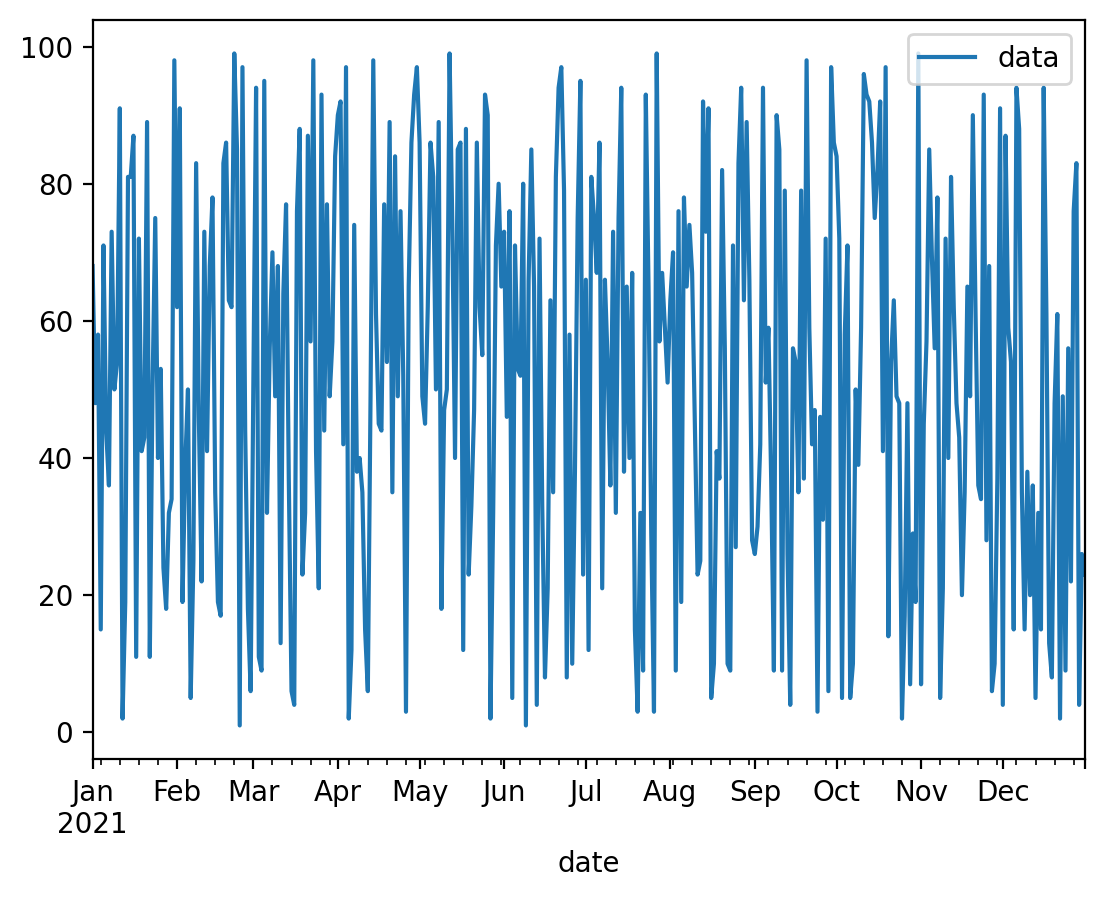

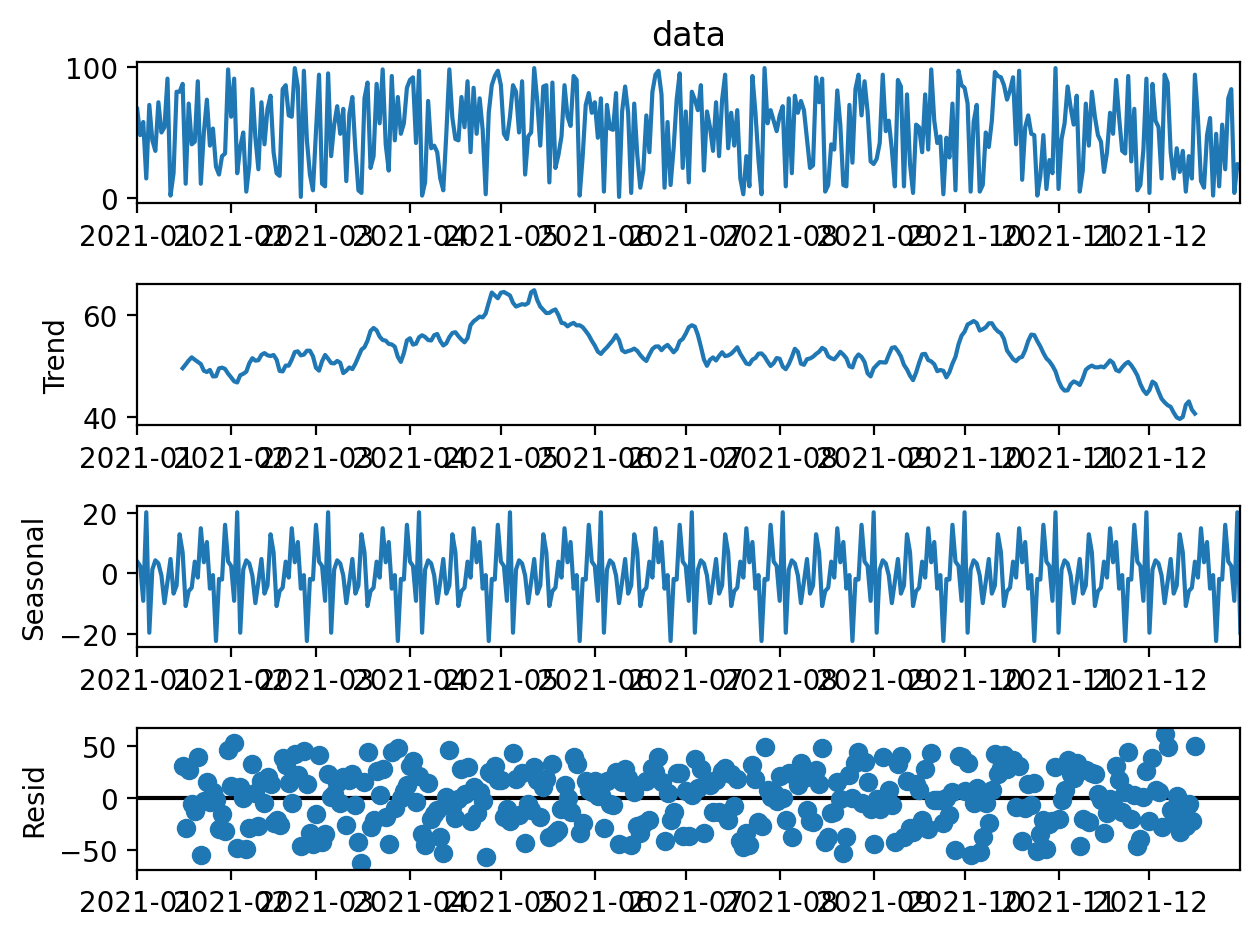

<Figure size 500x300 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# create a date range
date_rng = pd.date_range(start='1/1/2021', end='12/31/2021', freq='D')

# create a DataFrame with random data
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

# set the date column as the index
df.set_index('date', inplace=True)

# plot the data
plt.plot(df.index, df['data'], label='Data')

# plot the rolling mean and standard deviation
rolling_mean = df.rolling(window=30).mean()
rolling_std = df.rolling(window=30).std()
plt.plot(rolling_mean.index, rolling_mean['data'], label='Rolling Mean')
plt.plot(rolling_std.index, rolling_std['data'], label='Rolling Std')
plt.legend(loc='upper left')
plt.figure(figsize=(3,3))
plt.show()

# plot the seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df['data'], model='additive', period=30)
# trend(추세) : 시계열이 시간에 따라 증가/감소/일정수준 유지
# decomposition.observed.plot(legend=True)
fig = decomposition.plot() 
plt.figure(figsize=(5,3))
plt.show()

#### sarima 모형 summary 설명

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# create a date range
date_rng = pd.date_range(start='1/1/2021', end='12/31/2021', freq='D')

# create a DataFrame with random data
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

# set the date column as the index
df.set_index('date', inplace=True)

# fit a SARIMA model
model = sm.tsa.statespace.SARIMAX(df['data'], order=(1,0,0), seasonal_order=(1,1,1,12))
results = model.fit()

# print the model summary
print(results.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.72176D+00    |proj g|=  6.43750D-02

At iterate    5    f=  4.69796D+00    |proj g|=  1.06555D-02

At iterate   10    f=  4.64108D+00    |proj g|=  6.60360D-02

At iterate   15    f=  4.63857D+00    |proj g|=  7.08892D-05

At iterate   20    f=  4.63789D+00    |proj g|=  1.66979D-02

At iterate   25    f=  4.63753D+00    |proj g|=  7.18312D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     38      1     0     0   

- Coefficients: 종속변수의 시차값과 모델의 계절성분에 적용되는 가중치를 나타냅니다. 시계열의 현재 값과 과거 값, 그리고 시계열의 계절적 구성 요소 간 관계의 강도와 방향을 나타냅니다.
- 표준 오차: 계수 추정치의 불확실성 수준을 나타냅니다. 표준 오차가 작을수록 더 정확한 추정치를 제안합니다.
- t-값: 계수 추정치와 표준 오차의 비율을 나타내며 계수가 통계적으로 유의한지(즉, 0과 유의하게 다른지 여부)를 나타냅니다. 더 큰 절대 t-값은 더 중요한 계수를 나타냅니다.
- p-값: 계수가 0이라는 귀무가설을 가정하여 관측된 값만큼 극단적인 t-값을 얻을 확률을 나타냅니다. 0.05 미만의 p-값은 종종 통계적 유의성에 대한 임계값으로 사용됩니다.
- AIC 및 BIC: 모델의 적합도와 모델의 복잡성 간의 균형을 맞추는 정보 기준입니다. AIC 및 BIC의 값이 낮을수록 매개변수가 더 많은 모델에 대한 패널티와 함께 ​​더 나은 적합도를 나타냅니다.
- 로그 우도: 이것은 모델의 적합도를 측정한 것으로, 주어진 매개변수 추정치에서 관찰된 데이터의 로그 우도를 나타냅니다.
- Ljung-Box(Q) 통계: 모델의 잔차가 백색잡음인지(즉, 직렬상관이 없는지) 검정이다. 작은 p-값(<0.05)은 잔차가 백색 잡음이 아니며 모델을 개선해야 할 수 있음을 나타냅니다.
- Durbin-Watson 통계량: 모형의 잔차에 자기상관이 있는지를 검정하는 것이다. 값의 범위는 0에서 4까지이며 값 2는 자기 상관이 없음을 나타냅니다.
- 조건부 제곱합(CSS) 통계: 모델의 적합도를 측정한 것으로 모델의 오차 제곱합을 나타냅니다.
- Scale: 데이터의 척도를 측정한 것으로 로그 우도 및 AIC/BIC 값을 계산하는 데 사용됩니다.
- Seasonal periods: 각 계절 주기의 관측 횟수를 나타냅니다. 예를 들어 계절 기간 12는 연간 계절 주기가 있는 월별 데이터를 나타냅니다.

SARIMA 모형 요약을 해석할 때 계수, AIC/BIC 값 및 **잔차**에 대한 진단 검정(예: Ljung-Box 및 Durbin-Watson 검정)의 유의성에 주의를 기울이는 것이 중요합니다. 유의한 계수는 해당 시차 또는 계절 성분이 계열을 예측하는 데 중요함을 나타냅니다. AIC/BIC 값이 낮을수록 적합도가 더 높으며 페널티가 있습니다.

### 가중이동평균(EWMA)

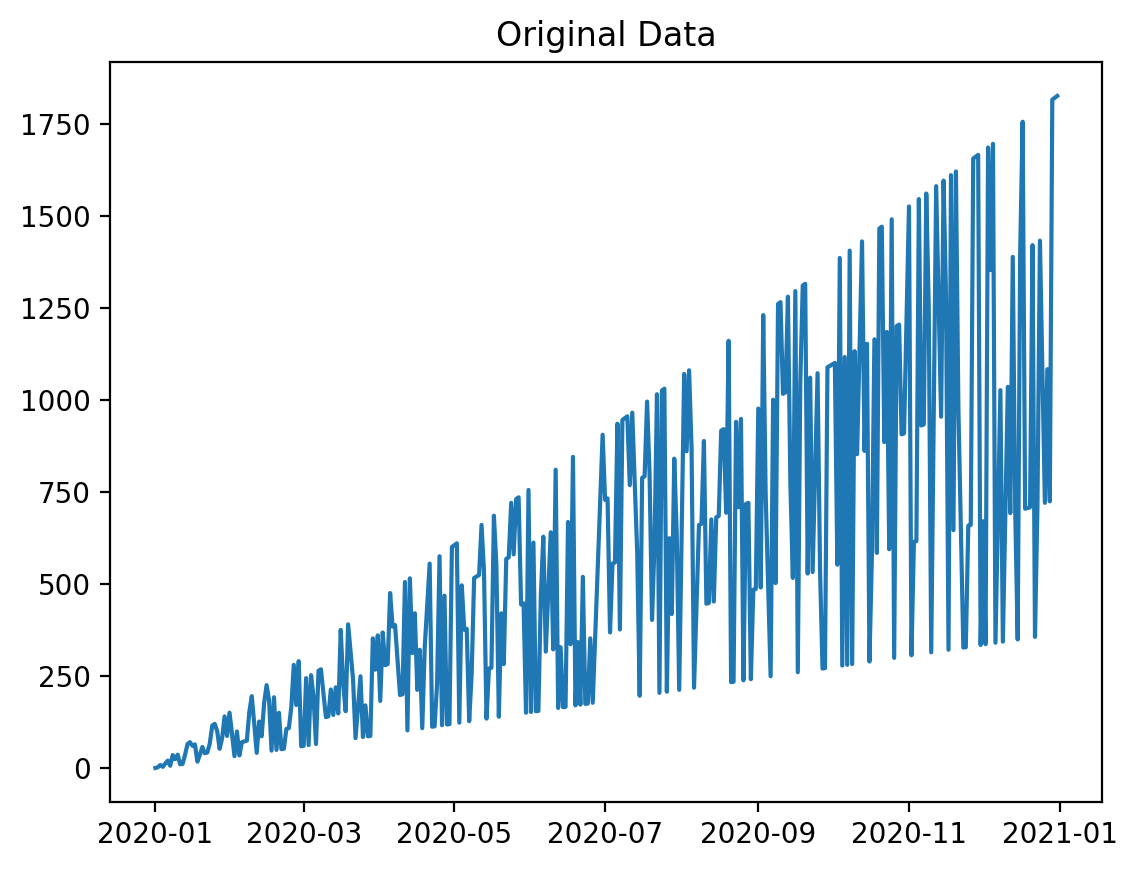

<Figure size 300x300 with 0 Axes>

,data,ma,ewma
date,,,
2020-01-01,0.0,NaN,0.000000
2020-01-02,2.0,NaN,1.250000
2020-01-03,8.0,3.25,4.693878
2020-01-04,3.0,6.25,3.915441
2020-01-05,12.0,10.75,7.421929


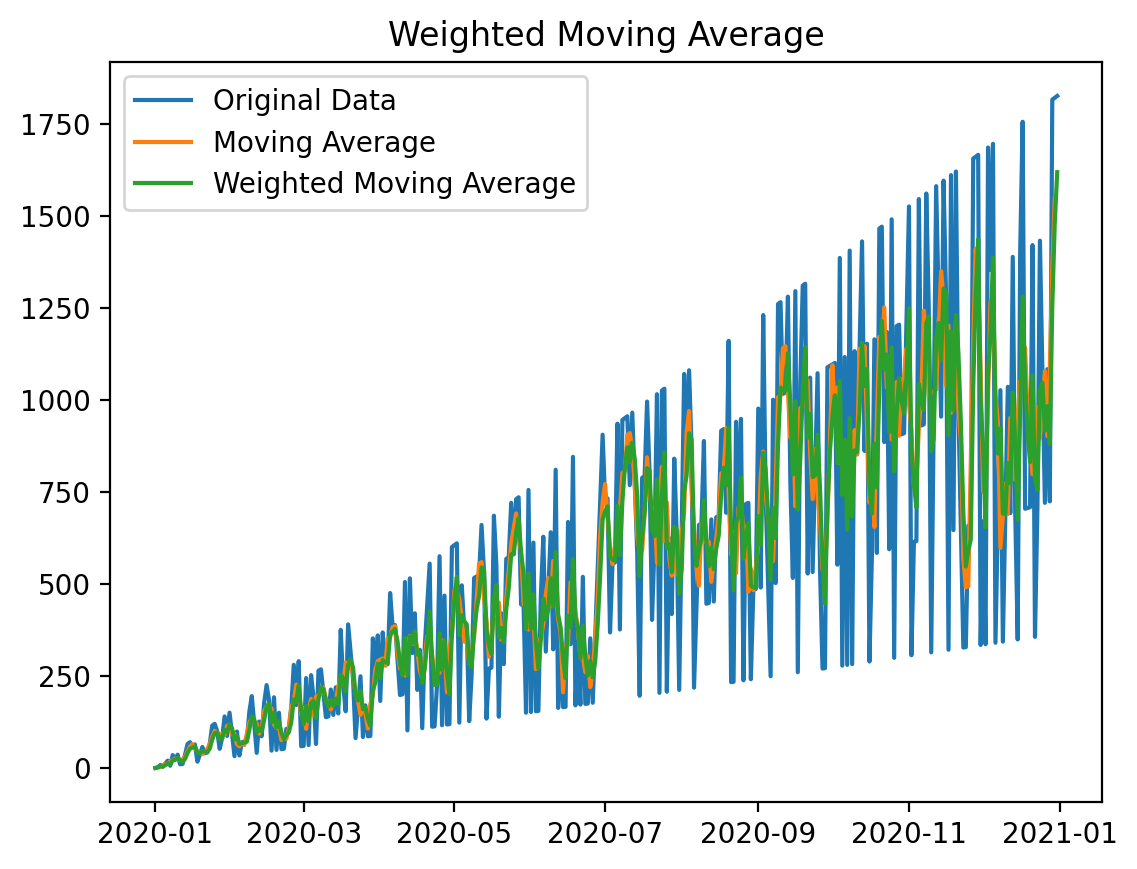

<Figure size 300x300 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# create a date range
date_rng = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
df = pd.DataFrame(date_rng, columns=['date'])
# data 값 임의 생성
for i in range(366) :
    df.loc[i, 'data'] = i * np.random.randint(1, 6)

# set the date column as the index
df.set_index('date', inplace=True)

# plot the data
plt.plot(df.index, df['data'])
plt.title('Original Data')
plt.figure(figsize=(3,3))
plt.show()

# calculate the weighted moving average
# ewm에 아래 옵션은 한 가지만 사용 가능
# com : a = 1/(1+com) (질량중심 평활계수)
# span : a = 2/(span+1) (계산기간 평활계수)
# halflife : a = e^2(-ln(2)/halflife) (반감기 평활계수)
# alpha : 평활계수 직접입력 (0 < a <=1)
# min_periods : 계산을 위한 최소 기간
df['ma'] = df['data'].rolling(window=4, center=True).mean()
df['ewma'] = df['data'].ewm(span=4).mean()
display(df.head(5))

# plot the weighted moving average
plt.plot(df.index, df['data'], label='Original Data')
plt.plot(df.index, df['ma'], label='Moving Average')
plt.plot(df.index, df['ewma'], label='Weighted Moving Average')
plt.title('Weighted Moving Average')
plt.legend()
plt.figure(figsize=(3,3))
plt.show()